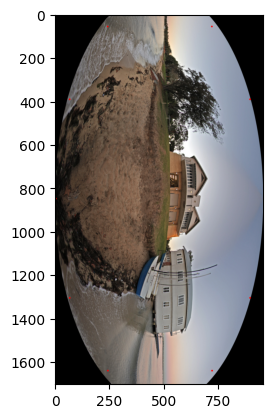

Boundary points: [(3, 849), (67, 392), (242, 57), (482, -64), (722, 57), (898, 392), (963, 849), (898, 1306), (723, 1641), (483, 1763), (243, 1641), (67, 1306)]


In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load the fisheye image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to get black background vs. image
_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Get largest contour (outer ellipse)
contour = max(contours, key=cv2.contourArea)

# Fit ellipse to contour
ellipse = cv2.fitEllipse(contour)
(x_center, y_center), (major_axis, minor_axis), angle = ellipse

# Sample 12 evenly spaced points along ellipse boundary
points = []
for i in range(12):
    theta = 2 * math.pi * i / 12
    # Parametric equation of rotated ellipse
    cos_a = math.cos(math.radians(angle))
    sin_a = math.sin(math.radians(angle))
    x = (major_axis/2) * math.cos(theta)
    y = (minor_axis/2) * math.sin(theta)
    x_rot = x * cos_a - y * sin_a + x_center
    y_rot = x * sin_a + y * cos_a + y_center
    points.append((int(x_rot), int(y_rot)))

# Draw points on image
for (px, py) in points:
    cv2.circle(img, (px, py), 4, (0, 0, 255), -1)

# Show
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Print points
print("Boundary points:", points)


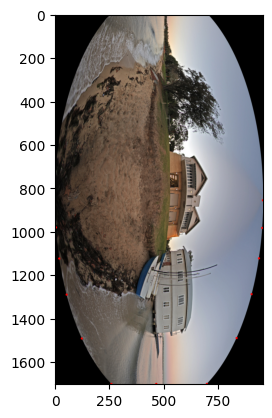

Sampled boundary points: [(np.int32(957), np.int32(857)), (np.int32(954), np.int32(984)), (np.int32(939), np.int32(1124)), (np.int32(905), np.int32(1289)), (np.int32(836), np.int32(1491)), (np.int32(699), np.int32(1702)), (np.int32(466), np.int32(1702)), (np.int32(259), np.int32(1702)), (np.int32(123), np.int32(1493)), (np.int32(53), np.int32(1291)), (np.int32(19), np.int32(1125)), (np.int32(4), np.int32(982))]


In [8]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to separate black background
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contour of boundary
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Compute centroid (approx center of fisheye)
M = cv2.moments(contour)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])

# Convert contour points to polar coordinates relative to center
angles = np.linspace(0, 2*np.pi, 361)  # 1-degree resolution
boundary_points = []

for a in angles:
    # Ray from center at angle a
    dir_x, dir_y = math.cos(a), math.sin(a)
    max_dist = 0
    closest_point = None

    for pt in contour:
        x, y = pt[0]
        dx, dy = x - cx, y - cy
        if dx * dir_x + dy * dir_y > 0:  # Same direction
            dist = math.hypot(dx, dy)
            angle_diff = abs(math.atan2(dy, dx) - a)
            if angle_diff < math.radians(1):  # ~1 degree tolerance
                if dist > max_dist:
                    max_dist = dist
                    closest_point = (x, y)
    if closest_point is not None:
        boundary_points.append(closest_point)

# Now sample exactly 12 evenly spaced angles from boundary_points
sampled_points = [boundary_points[int(i * len(boundary_points) / 12)] for i in range(12)]

# Draw sampled points
for (px, py) in sampled_points:
    cv2.circle(img, (px, py), 5, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print("Sampled boundary points:", sampled_points)


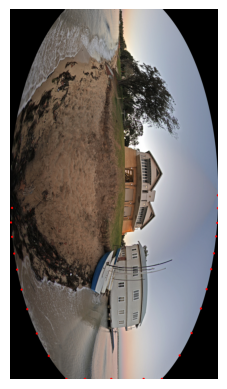

Sampled 24 boundary points: [(np.int32(957), np.int32(857)), (np.int32(957), np.int32(916)), (np.int32(954), np.int32(984)), (np.int32(949), np.int32(1046)), (np.int32(939), np.int32(1124)), (np.int32(926), np.int32(1197)), (np.int32(905), np.int32(1289)), (np.int32(879), np.int32(1378)), (np.int32(836), np.int32(1491)), (np.int32(781), np.int32(1594)), (np.int32(699), np.int32(1702)), (np.int32(615), np.int32(1702)), (np.int32(466), np.int32(1702)), (np.int32(345), np.int32(1702)), (np.int32(259), np.int32(1702)), (np.int32(178), np.int32(1596)), (np.int32(123), np.int32(1493)), (np.int32(79), np.int32(1381)), (np.int32(53), np.int32(1291)), (np.int32(32), np.int32(1199)), (np.int32(19), np.int32(1125)), (np.int32(9), np.int32(1048)), (np.int32(4), np.int32(982)), (np.int32(9), np.int32(915))]


In [11]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to separate black background
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contour of boundary
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Compute centroid (approx center of fisheye)
M = cv2.moments(contour)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])

# Convert contour points to polar coordinates relative to center
angles = np.linspace(0, 2*np.pi, 361)  # 1-degree resolution
boundary_points = []

for a in angles:
    dir_x, dir_y = math.cos(a), math.sin(a)
    max_dist = 0
    closest_point = None

    for pt in contour:
        x, y = pt[0]
        dx, dy = x - cx, y - cy
        if dx * dir_x + dy * dir_y > 0:  # Same general direction
            dist = math.hypot(dx, dy)
            angle_diff = abs(math.atan2(dy, dx) - a)
            if angle_diff < math.radians(1):  # ~1 degree tolerance
                if dist > max_dist:
                    max_dist = dist
                    closest_point = (x, y)
    if closest_point is not None:
        boundary_points.append(closest_point)

# Sample exactly 24 evenly spaced points
sampled_points = [boundary_points[int(i * len(boundary_points) / 24)] for i in range(24)]

# Draw sampled points
for (px, py) in sampled_points:
    cv2.circle(img, (px, py), 5, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Sampled 24 boundary points:", sampled_points)


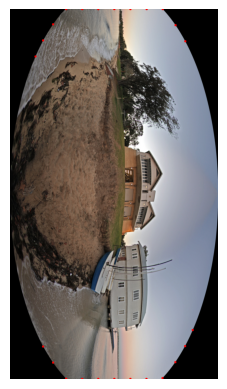

Sampled 24 left/right points: [(np.int32(117), np.int32(218)), (np.int32(152), np.int32(144)), (np.int32(198), np.int32(70)), (np.int32(258), np.int32(0)), (np.int32(332), np.int32(0)), (np.int32(406), np.int32(0)), (np.int32(480), np.int32(0)), (np.int32(554), np.int32(0)), (np.int32(629), np.int32(0)), (np.int32(703), np.int32(0)), (np.int32(762), np.int32(74)), (np.int32(807), np.int32(148)), (np.int32(841), np.int32(1477)), (np.int32(806), np.int32(1551)), (np.int32(761), np.int32(1625)), (np.int32(702), np.int32(1698)), (np.int32(628), np.int32(1702)), (np.int32(554), np.int32(1702)), (np.int32(480), np.int32(1702)), (np.int32(406), np.int32(1702)), (np.int32(332), np.int32(1702)), (np.int32(258), np.int32(1701)), (np.int32(198), np.int32(1627)), (np.int32(152), np.int32(1553))]


In [12]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to separate black background
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contour of boundary
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Compute centroid
M = cv2.moments(contour)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])

# Keep only left/right points (exclude top/bottom)
# Here, we exclude points within ±30 degrees of vertical (top/bottom)
filtered_points = []
for pt in contour:
    x, y = pt[0]
    angle = math.degrees(math.atan2(y - cy, x - cx))
    if 60 < abs(angle) < 120:  # roughly left and right regions
        filtered_points.append((x, y))

# Sort by angle for consistent ordering
filtered_points.sort(key=lambda p: math.atan2(p[1] - cy, p[0] - cx))

# Sample 24 points evenly from filtered points
sampled_points = [filtered_points[int(i * len(filtered_points) / 24)] for i in range(24)]

# Draw sampled points
for (px, py) in sampled_points:
    cv2.circle(img, (px, py), 5, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Sampled 24 left/right points:", sampled_points)
